In [1]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [4]:
Diamonds= pd.read_csv('C:/Users/elean/Downloads/Diamonds/Diamonds.csv')

In [61]:
Diamonds.head(15)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR,clarityR
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,2
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,1,0
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,1,3
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,5,1
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,6,2
5,5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,4,6,4
6,6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,4,5,5
7,7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,4,3,0
8,8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,3,1,1
9,9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,4,3,3


In [14]:
def cut_recode (series): 
    if series == "Ideal":
        return 0
    if series == "Premium": 
        return 1
    if series == "Very Good": 
        return 2
    if series == "Good": 
        return 3
    if series == "Fair": 
        return 4
Diamonds['cutR'] = Diamonds['cut'].apply(cut_recode)

In [15]:
Diamonds.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cutR
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3


In [18]:
Diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [19]:
def color_recode (series): 
    if series == "G": 
        return 0
    if series == "E": 
        return 1
    if series == "F": 
        return 2
    if series == "H": 
        return 3
    if series == "D": 
        return 4
    if series == "I": 
        return 5
    if series == "J": 
        return 6

Diamonds['colorR'] = Diamonds['color'].apply(color_recode)

In [20]:
Diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,1
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3,1
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,5
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3,6


In [21]:
Diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [22]:
def clarity_recode (series): 
    if series == "SI1": 
        return 0
    if series == "VS2": 
        return 1
    if series == "SI2": 
        return 2
    if series == "VS1": 
        return 3
    if series == "VVS2": 
        return 4
    if series == "VVS1": 
        return 5
    if series == "IF": 
        return 6
    if series == "I1": 
        return 7

Diamonds['clarityR'] = Diamonds['clarity'].apply(clarity_recode)

In [23]:
Diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR,clarityR
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,2
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,1,0
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3,1,3
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,5,1
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3,6,2


In [47]:
x = Diamonds[['carat', 'cutR', 'colorR','clarityR']]

In [25]:
y = Diamonds ['price']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [27]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


In [41]:
Diamonds.head(15)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR,clarityR
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,2
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,1,0
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3,1,3
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,5,1
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3,6,2
5,5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2,6,4
6,6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2,5,5
7,7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,2,3,0
8,8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,4,1,1
9,9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,2,3,3


In [44]:
def cut_recode (series): 
    if series == "Ideal": 
        return 0
    if series == "Premium": 
        return 1
    if series == "Good": 
        return 2
    if series == "Fair": 
        return 3
    if series == "Very Good": 
        return 4
    

Diamonds['cutR'] = Diamonds['cut'].apply(cut_recode)

In [45]:
Diamonds.head(15)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR,clarityR
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,2
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,1,0
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,1,3
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,5,1
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,6,2
5,5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,4,6,4
6,6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,4,5,5
7,7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,4,3,0
8,8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,3,1,1
9,9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,4,3,3


In [50]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [51]:
predictions = lm.predict(x_test)
predictions

array([2299.06011401, 5326.34764225,  509.10242054, ..., 5094.88456581,
       5254.7355869 ,  144.80407062])

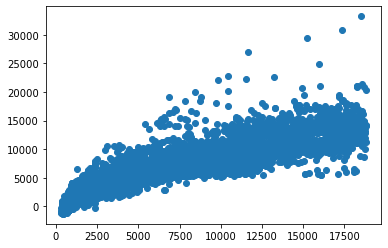

In [52]:
plt.scatter(y_test, predictions)

In [53]:
print("Price:", lm.score(x_test, y_test))

Price: 0.8594758428840953


In [54]:
metrics.mean_absolute_error(y_test, predictions)

961.0754973578609

In [55]:
metrics.mean_squared_error(y_test, predictions)

2232382.86778791

In [56]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1494.1160824339956

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [58]:
kfold = KFold(3, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     4 ... 53937 53938 53939], test: [    2     3     8 ... 53932 53934 53935]
train: [    1     2     3 ... 53935 53938 53939], test: [    0     4     6 ... 53933 53936 53937]
train: [    0     2     3 ... 53935 53936 53937], test: [    1     5     9 ... 53931 53938 53939]


C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [59]:
print(cross_val_score(lm, x,y, cv=3))

[-0.05902206  0.69979158 -0.77069492]
